# Sentiment Analysis  - Hotel Reviews
### Temmuz Yavuzer - 444130
### Merve Kiratli - 431674 

# Introduction of the Project

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

You can access the dataset we used for this project on kaggle.
**515K Hotel Reviews Data in Europe**

The biggest reason for choosing this dataset is that we both have worked in the tourism sector before. In addition, the fact that we know so many people from this sector is that this project will perhaps help our friends in the future.

# DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
dataset = pd.read_csv("Hotel_Reviews.csv")

In [3]:
dataset

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


As you can see from the dataset that, we have so many unnecesary columns. Before starting to analyze the dataset, we should work a little bit with it. Our main focus will be Negative and Positive Reviews

# DATA CLEANING 
To get rid of the unnecerasy columns, we need to drop those values, such as ;

'Additional_Number_of_Scoring', 'Review_Date',
'Reviewer_Nationality','Average_Score',
'Review_Total_Negative_Word_Counts',
'Total_Number_of_Reviews',
'Review_Total_Positive_Word_Counts',
'Total_Number_of_Reviews_Reviewer_Has_Given',
'Tags','days_since_review', 'lat', 'lng'

In [4]:
dataset = dataset.drop(columns = ['Additional_Number_of_Scoring', 'Review_Date',
        'Reviewer_Nationality','Average_Score',
        'Review_Total_Negative_Word_Counts',
        'Total_Number_of_Reviews',
        'Review_Total_Positive_Word_Counts',
        'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags',
        'days_since_review', 'lat', 'lng'])

Another problem with this dataset it it has unnecessary values in the Negative_Review column. We should also drop this to investigate more 

In [5]:
dataset = dataset[~dataset["Negative_Review"].isin(["No Negative", "Nothing", "nothing", "N A"])]

In [6]:
dataset["Negative_Review"].count()

387848

In [7]:
dataset

,Hotel_Address,Hotel_Name,Negative_Review,Positive_Review,Reviewer_Score
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Backyard of the hotel is total mess shouldn t...,Good restaurant with modern design great chil...,6.7
...,...,...,...,...,...
515731,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,No parking Public parking garage is 15 Euro p...,Good breakfast,7.5
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,no trolly or staff to help you take the lugga...,location,7.0
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,The hotel looks like 3 but surely not 4,Breakfast was ok and we got earlier check in,5.8
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,The ac was useless It was a hot week in vienn...,No Positive,2.5


Lets combine the both positive and the negative reviews into the combined column,
then create another column that will store the score of the comment. However, to make our work much more easiers, if the review score is less than 5, then it will be a negative review. If it is more than 5, then that means that it is a positive comment about the hotel 

In [8]:
dataset["combined"] = dataset["Negative_Review"] + dataset["Positive_Review"]

In [9]:
dataset["combined"]

0          I am so angry that i made this post available...
2          Rooms are nice but for elderly a bit difficul...
3          My room was dirty and I was afraid to walk ba...
4          You When I booked with your company on line y...
5          Backyard of the hotel is total mess shouldn t...
                                ...                        
515731     No parking Public parking garage is 15 Euro p...
515733     no trolly or staff to help you take the lugga...
515734     The hotel looks like 3 but surely not 4  Brea...
515735     The ac was useless It was a hot week in vienn...
515737     I was in 3rd floor It didn t work Free Wife  ...
Name: combined, Length: 387848, dtype: object

In [10]:
def get_is_bad(score):
        if score < 5:
            return 1
        else:
            return 0

In [11]:
def create_is_it_bad(dataset):
    dataset["is_bad?"] = dataset["Reviewer_Score"].apply(get_is_bad)
    dataset = dataset[["combined", "is_bad?"]]
    return dataset

In [12]:
dataset = create_is_it_bad(dataset)

In [13]:
dataset.head()

,combined,is_bad?
0,I am so angry that i made this post available...,1
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0
5,Backyard of the hotel is total mess shouldn t...,0


# Imbalanced Dataset - Downsampled 

In [14]:
bad_reviews = dataset[dataset["is_bad?"] == 1]
good_reviews = dataset[dataset["is_bad?"] == 0]

In [15]:
print(bad_reviews.count())
print(good_reviews.count())

combined    21632
is_bad?     21632
dtype: int64
combined    366216
is_bad?     366216
dtype: int64


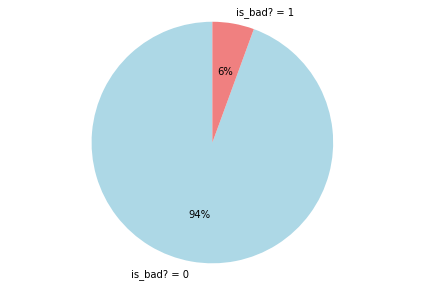

In [16]:
is_bad_counts = dataset["is_bad?"].value_counts()

labels = ['is_bad? = 0', 'is_bad? = 1']
colors = ['lightblue', 'lightcoral']

plt.pie(is_bad_counts, labels=labels, colors=colors, startangle=90, autopct='%1.f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

The biggest problem this dataset has is, it is an imbalanced dataset. An imbalanced dataset is a problem for machine learning models because it can negatively affect the model's performance. 
This happens because the model is trained on an unbalanced distribution of classes, and as a result, it can develop biases towards the majority class. 

So that we need to down/up sample the dataset. We decided to downsample the dataset because it was huge and taking so many times to process/train the machine learning models

In [17]:
num_samples = min(bad_reviews.shape[0], good_reviews.shape[0])

bad_reviews = bad_reviews.sample(num_samples, replace=False, random_state=42)
good_reviews = good_reviews.sample(num_samples, replace=False, random_state=42)

dataset = pd.concat([bad_reviews, good_reviews], axis=0)

In [18]:
dataset

,combined,is_bad?
250603,Most staff are not helpful specially night sh...,1
254526,Very poor value for money and inaccurate infl...,1
213772,I left my glasses in the room and was told th...,1
462243,They took my money without permission 150USD ...,1
475879,They most change THE restaurant staf and wual...,1
...,...,...
274193,No supermarkets or restaurants nearby The ro...,0
412052,Staff slightly unfriendly at times Location q...,0
258313,Nothing really a good base for our weekend S...,0
269238,All the staff were wonderful Especially Josef...,0


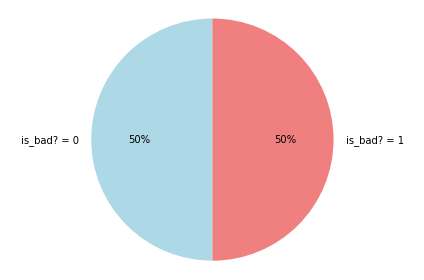

In [19]:
is_bad_counts = dataset["is_bad?"].value_counts()

labels = ['is_bad? = 0', 'is_bad? = 1']
colors = ['lightblue', 'lightcoral']

plt.pie(is_bad_counts, labels=labels, colors=colors, startangle=90, autopct='%1.f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

As you can see from the chart that, we have a balanced dataset right now

# Cleaning The Text

We cleaned the dataset but we also need to clean the text inside of the reviews.

Parts of Speech explains how a word is used in a sentence, i.e whether it is a verb, noun, adjective and so on using the WordNet lexical database

- 'J', stands for adjective.
- 'V', stands for verb.
- 'N', stands for noun.
- 'R', stands for adverb.

In [20]:
def wordnet_pos(pos_tag):
    if pos_tag[0] in ['J', 'V', 'N', 'R']:
        if pos_tag[0] == 'J':
            return wordnet.ADJ
        elif pos_tag[0] == 'V':
            return wordnet.VERB
        elif pos_tag[0] == 'N':
            return wordnet.NOUN
        elif pos_tag[0] == 'R':
            return wordnet.ADV
    else:
        return wordnet.NOUN

Lets also clean the text:

- Convert the text to lowercase.
- Tokenize the text and remove punctuation.
- Remove words that contain numbers.
- Remove stop words (common words such as "the" or "and" that are not meaningful for NLP tasks).
- Remove empty tokens.
- Part-of-speech tag the text.
- Lemmatize the text, which means reducing words to their base form.
- Remove words that consist of only one letter.


In [21]:
def clean_it(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop_words = stopwords.words('english')
    text = [word for word in text if word not in stop_words]
    text = [word for word in text if len(word) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(word, wordnet_pos(tag)) for word, tag in pos_tags]
    text = [word for word in text if len(word) > 1]
    text = " ".join(text)
    return text


In [22]:
dataset["combined_clean"] = dataset["combined"].apply(clean_it)

In [23]:
dataset.sample(10)

,combined,is_bad?,combined_clean
290893,The lobby and breakfast The location of the h...,0,lobby breakfast location hotel
180318,Parking Blicked sink Water switching in the s...,1,park blicked sink water switch shower cold hot...
502690,Cousins in room had stains on and cups and sp...,0,cousin room stain cups spoon clean replace inf...
254592,Rooms were a bit worn out and could have used...,0,room bite worn could use little detailed clean...
257800,A bit oldish rooms obviously need to be refre...,0,bit oldish room obviously need refresh locatio...
123252,very small rooms for a family great location,0,small room family great location
350372,Mini bar not stocked every day Room was so so...,0,mini bar stock every day room hot definitely w...
451124,Nothing Everything,0,nothing everything
242831,Only one plug in the room No soap to wash han...,1,one plug room soap wash handsno positive
53339,We didn t like being woken during the night b...,1,like woken night security ask turn tv already ...


### Subjectivity and Polarity

Lets add Subjectivity and Polarity, but what are those;

**Subjectivity** is level of personal opinion, emotion, or bias expressed in a piece of text. Usually ranging from 0 to 1, where 0 represents a completely objective text and 1 represents a completely subjective text.

**Polarity** value between -1 and 1, where -1 represents a negative sentiment, 1 represents a positive sentiment, and 0 represents a neutral sentiment.

In [24]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [25]:
def subjectivity(x):
    blob = TextBlob(x)
    return blob.sentiment.subjectivity

In [26]:
def polarity(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity

In [27]:
dataset['subjectivity']= dataset['combined_clean'].apply(subjectivity)
dataset

,combined,is_bad?,combined_clean,subjectivity
250603,Most staff are not helpful specially night sh...,1,staff helpful specially night shift except hab...,0.435714
254526,Very poor value for money and inaccurate infl...,1,poor value money inaccurate inflate price book...,0.564242
213772,I left my glasses in the room and was told th...,1,left glass room tell find put bedside table br...,0.381818
462243,They took my money without permission 150USD ...,1,take money without permission smoking fee smok...,0.744444
475879,They most change THE restaurant staf and wual...,1,change restaurant staf wualety food prises foo...,0.808333
...,...,...,...,...
274193,No supermarkets or restaurants nearby The ro...,0,supermarket restaurant nearby room comfortable...,0.620833
412052,Staff slightly unfriendly at times Location q...,0,staff slightly unfriendly time location quite ...,0.545238
258313,Nothing really a good base for our weekend S...,0,nothing really good base weekend staff polite ...,0.650000
269238,All the staff were wonderful Especially Josef...,0,staff wonderful especially josef thank love in...,0.785000


In [28]:
dataset['polarity']= dataset['combined_clean'].apply(polarity)
dataset

,combined,is_bad?,combined_clean,subjectivity,polarity
250603,Most staff are not helpful specially night sh...,1,staff helpful specially night shift except hab...,0.435714,0.678571
254526,Very poor value for money and inaccurate infl...,1,poor value money inaccurate inflate price book...,0.564242,0.064545
213772,I left my glasses in the room and was told th...,1,left glass room tell find put bedside table br...,0.381818,-0.057576
462243,They took my money without permission 150USD ...,1,take money without permission smoking fee smok...,0.744444,-0.016667
475879,They most change THE restaurant staf and wual...,1,change restaurant staf wualety food prises foo...,0.808333,-0.650000
...,...,...,...,...,...
274193,No supermarkets or restaurants nearby The ro...,0,supermarket restaurant nearby room comfortable...,0.620833,0.258333
412052,Staff slightly unfriendly at times Location q...,0,staff slightly unfriendly time location quite ...,0.545238,0.347619
258313,Nothing really a good base for our weekend S...,0,nothing really good base weekend staff polite ...,0.650000,0.244444
269238,All the staff were wonderful Especially Josef...,0,staff wonderful especially josef thank love in...,0.785000,0.415000


### Stemming
Stemming is a process of reducing words to their base or root form, usually to make text analysis more efficient. For example, the word "running" might be stemmed to "run".  
It helps us to reduce the dimensionality of the data, making it easier to identify patterns and relationships in the text.

In [29]:
dataset['stemming'] = dataset['combined_clean'].str.split()
dataset['stemming'] = dataset['stemming'].apply(lambda x: [stemmer.stem(y) for y in x])

In [30]:
dataset

,combined,is_bad?,combined_clean,subjectivity,polarity,stemming
250603,Most staff are not helpful specially night sh...,1,staff helpful specially night shift except hab...,0.435714,0.678571,"[staff, help, special, night, shift, except, h..."
254526,Very poor value for money and inaccurate infl...,1,poor value money inaccurate inflate price book...,0.564242,0.064545,"[poor, valu, money, inaccur, inflat, price, bo..."
213772,I left my glasses in the room and was told th...,1,left glass room tell find put bedside table br...,0.381818,-0.057576,"[left, glass, room, tell, find, put, bedsid, t..."
462243,They took my money without permission 150USD ...,1,take money without permission smoking fee smok...,0.744444,-0.016667,"[take, money, without, permiss, smoke, fee, sm..."
475879,They most change THE restaurant staf and wual...,1,change restaurant staf wualety food prises foo...,0.808333,-0.650000,"[chang, restaur, staf, wualeti, food, prise, f..."
...,...,...,...,...,...,...
274193,No supermarkets or restaurants nearby The ro...,0,supermarket restaurant nearby room comfortable...,0.620833,0.258333,"[supermarket, restaur, nearbi, room, comfort, ..."
412052,Staff slightly unfriendly at times Location q...,0,staff slightly unfriendly time location quite ...,0.545238,0.347619,"[staff, slight, unfriend, time, locat, quit, w..."
258313,Nothing really a good base for our weekend S...,0,nothing really good base weekend staff polite ...,0.650000,0.244444,"[noth, realli, good, base, weekend, staff, pol..."
269238,All the staff were wonderful Especially Josef...,0,staff wonderful especially josef thank love in...,0.785000,0.415000,"[staff, wonder, especi, josef, thank, love, in..."


Lets get the frequency of the words

In [31]:
freq = {}
def calculate_mostFrequent(s):
    for word in s:
        if word in freq:
            freq[word] = freq[word] + 1
        else:
            freq[word] = 1

for col in dataset['stemming']:
    calculate_mostFrequent(col)

print(freq)

{'staff': 18313, 'help': 5596, 'special': 511, 'night': 5812, 'shift': 116, 'except': 654, 'habib': 1, 'hassan': 1, 'tunisian': 1, 'ladi': 584, 'din': 223, 'room': 45967, 'tri': 1436, 'best': 1037, 'locat': 16341, 'poor': 3851, 'valu': 1337, 'money': 2471, 'inaccur': 9, 'inflat': 10, 'price': 3387, 'book': 5875, 'com': 1276, 'order': 1014, 'offer': 1572, 'high': 1287, 'discount': 224, 'fit': 551, 'cheap': 634, 'furnish': 216, 'maintain': 190, 'hotel': 23825, 'also': 3455, 'smell': 1531, 'kitchen': 280, 'posit': 8312, 'well': 3422, 'recept': 4353, 'howev': 902, 'servic': 5474, 'end': 824, 'left': 178, 'glass': 618, 'tell': 2511, 'find': 2084, 'put': 1247, 'bedsid': 116, 'tabl': 768, 'breakfast': 11969, 'check': 4791, 'compens': 232, 'custom': 1197, 'take': 3037, 'without': 1231, 'permiss': 41, 'smoke': 686, 'fee': 180, 'cigaret': 5, 'anyth': 949, 'rule': 51, 'insol': 6, 'first': 2085, 'saw': 265, 'ugli': 102, 'relev': 9, 'chang': 1844, 'restaur': 2795, 'staf': 52, 'wualeti': 1, 'food': 

In [32]:
sorted_dict = sorted(freq.items(), key=lambda x: x[1], reverse=True)
top_words = {}
count=1
for i,j in sorted_dict:
    if count > 25:
        break
    top_words[i] = j
    count=count+1

print(top_words)

{'room': 45967, 'hotel': 23825, 'staff': 18313, 'locat': 16341, 'breakfast': 11969, 'bed': 10534, 'good': 10413, 'posit': 8312, 'small': 8043, 'stay': 7553, 'clean': 7159, 'get': 6545, 'noth': 5956, 'book': 5875, 'night': 5812, 'one': 5749, 'like': 5634, 'help': 5596, 'great': 5575, 'bathroom': 5482, 'servic': 5474, 'nice': 5293, 'would': 5222, 'friend': 5211, 'check': 4791}


As we can see from the results, the most repetitive words are generally; room, hotel, staff and location. These show us that we are on the right track, as these are often the factors that most influence a review to be good or bad.

In [33]:
dataset.drop("stemming", axis=1,inplace=True)

In [34]:
dataset

,combined,is_bad?,combined_clean,subjectivity,polarity
250603,Most staff are not helpful specially night sh...,1,staff helpful specially night shift except hab...,0.435714,0.678571
254526,Very poor value for money and inaccurate infl...,1,poor value money inaccurate inflate price book...,0.564242,0.064545
213772,I left my glasses in the room and was told th...,1,left glass room tell find put bedside table br...,0.381818,-0.057576
462243,They took my money without permission 150USD ...,1,take money without permission smoking fee smok...,0.744444,-0.016667
475879,They most change THE restaurant staf and wual...,1,change restaurant staf wualety food prises foo...,0.808333,-0.650000
...,...,...,...,...,...
274193,No supermarkets or restaurants nearby The ro...,0,supermarket restaurant nearby room comfortable...,0.620833,0.258333
412052,Staff slightly unfriendly at times Location q...,0,staff slightly unfriendly time location quite ...,0.545238,0.347619
258313,Nothing really a good base for our weekend S...,0,nothing really good base weekend staff polite ...,0.650000,0.244444
269238,All the staff were wonderful Especially Josef...,0,staff wonderful especially josef thank love in...,0.785000,0.415000


# Sentiment Scores
Now that we have done everything related to the data, we can now start the processes necessary for sentimental analysis.

In [35]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [36]:
sentiment_scores = dataset["combined"].apply(lambda x: sentiment_analyzer.polarity_scores(x))

In [37]:
dataset = pd.concat([dataset, sentiment_scores.apply(pd.Series)], axis=1)

In [38]:
dataset

,combined,is_bad?,combined_clean,subjectivity,polarity,neg,neu,pos,compound
250603,Most staff are not helpful specially night sh...,1,staff helpful specially night shift except hab...,0.435714,0.678571,0.082,0.771,0.147,0.4344
254526,Very poor value for money and inaccurate infl...,1,poor value money inaccurate inflate price book...,0.564242,0.064545,0.062,0.785,0.153,0.6105
213772,I left my glasses in the room and was told th...,1,left glass room tell find put bedside table br...,0.381818,-0.057576,0.230,0.690,0.080,-0.6920
462243,They took my money without permission 150USD ...,1,take money without permission smoking fee smok...,0.744444,-0.016667,0.082,0.918,0.000,-0.5106
475879,They most change THE restaurant staf and wual...,1,change restaurant staf wualety food prises foo...,0.808333,-0.650000,0.058,0.893,0.050,-0.2023
...,...,...,...,...,...,...,...,...,...
274193,No supermarkets or restaurants nearby The ro...,0,supermarket restaurant nearby room comfortable...,0.620833,0.258333,0.056,0.585,0.359,0.8977
412052,Staff slightly unfriendly at times Location q...,0,staff slightly unfriendly time location quite ...,0.545238,0.347619,0.146,0.633,0.221,0.7127
258313,Nothing really a good base for our weekend S...,0,nothing really good base weekend staff polite ...,0.650000,0.244444,0.148,0.563,0.290,0.6192
269238,All the staff were wonderful Especially Josef...,0,staff wonderful especially josef thank love in...,0.785000,0.415000,0.000,0.556,0.444,0.8854


Lets create sentiment scores, values means;
- negative: a score indicating the negative sentiment
- neutral: a score indicating the neutral sentiment
- positive: a score indicating the positive sentiment
- compound: a compound score that summarizes the overall sentiment

In [39]:
dataset["num_word"] = dataset["combined"].str.split(" ").str.len()
dataset["num_char"] = dataset["combined"].str.len()

In [40]:
dataset

,combined,is_bad?,combined_clean,subjectivity,polarity,neg,neu,pos,compound,num_word,num_char
250603,Most staff are not helpful specially night sh...,1,staff helpful specially night shift except hab...,0.435714,0.678571,0.082,0.771,0.147,0.4344,26,143
254526,Very poor value for money and inaccurate infl...,1,poor value money inaccurate inflate price book...,0.564242,0.064545,0.062,0.785,0.153,0.6105,52,294
213772,I left my glasses in the room and was told th...,1,left glass room tell find put bedside table br...,0.381818,-0.057576,0.230,0.690,0.080,-0.6920,40,210
462243,They took my money without permission 150USD ...,1,take money without permission smoking fee smok...,0.744444,-0.016667,0.082,0.918,0.000,-0.5106,45,237
475879,They most change THE restaurant staf and wual...,1,change restaurant staf wualety food prises foo...,0.808333,-0.650000,0.058,0.893,0.050,-0.2023,102,512
...,...,...,...,...,...,...,...,...,...,...,...
274193,No supermarkets or restaurants nearby The ro...,0,supermarket restaurant nearby room comfortable...,0.620833,0.258333,0.056,0.585,0.359,0.8977,31,168
412052,Staff slightly unfriendly at times Location q...,0,staff slightly unfriendly time location quite ...,0.545238,0.347619,0.146,0.633,0.221,0.7127,42,224
258313,Nothing really a good base for our weekend S...,0,nothing really good base weekend staff polite ...,0.650000,0.244444,0.148,0.563,0.290,0.6192,30,157
269238,All the staff were wonderful Especially Josef...,0,staff wonderful especially josef thank love in...,0.785000,0.415000,0.000,0.556,0.444,0.8854,18,99


In [41]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tagged_docs = [TaggedDocument(row.split(), [index]) for index, row in enumerate(dataset["combined_clean"])]

In [43]:
doc2vec_model = Doc2Vec(tagged_docs, vector_size=5, window=2, min_count=1, workers=4)

In [44]:
doc_vectors = dataset["combined_clean"].apply(lambda text: doc2vec_model.infer_vector(text.split(" "))).apply(pd.Series)
doc_vectors.columns = ["doc2vec_vector_" + str(column) for column in doc_vectors.columns]

In [45]:
dataset = dataset.join(doc_vectors)

Lets use Gensim library to create a Doc2Vec model. The Doc2Vec model is a type of unsupervised neural network that can be used to generate vector representations of documents. Our main focus is to transformed each text into numerical vectors using the word vectors (Doc2Vec).

Then we can use this values in our machine learning model

In [46]:
vectorizer = TfidfVectorizer(min_df=10)
tfidf_matrix = vectorizer.fit_transform(dataset["combined_clean"]).toarray()

In [47]:
tfidf_df = pd.DataFrame(tfidf_matrix, columns=vectorizer.get_feature_names_out())
tfidf_df.columns = ["word_" + str(col) for col in tfidf_df.columns]
tfidf_df.index = dataset.index

In [48]:
dataset = dataset.join(tfidf_df)

Term Frequency-Inverse Document Frequency (TF-IDF) technique, which is a common method for transforming text data into numerical vectors for use in machine learning models.
Our main focus here to create parameters that specifies the minimum number of documents that a word must appear in the text

In [49]:
dataset.head()

,combined,is_bad?,combined_clean,subjectivity,polarity,neg,neu,pos,compound,num_word,...,word_yo,word_yoghurt,word_yogurt,word_young,word_youth,word_yr,word_yummy,word_zero,word_zone,word_zoo
250603,Most staff are not helpful specially night sh...,1,staff helpful specially night shift except hab...,0.435714,0.678571,0.082,0.771,0.147,0.4344,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254526,Very poor value for money and inaccurate infl...,1,poor value money inaccurate inflate price book...,0.564242,0.064545,0.062,0.785,0.153,0.6105,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213772,I left my glasses in the room and was told th...,1,left glass room tell find put bedside table br...,0.381818,-0.057576,0.230,0.690,0.080,-0.6920,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
462243,They took my money without permission 150USD ...,1,take money without permission smoking fee smok...,0.744444,-0.016667,0.082,0.918,0.000,-0.5106,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475879,They most change THE restaurant staf and wual...,1,change restaurant staf wualety food prises foo...,0.808333,-0.650000,0.058,0.893,0.050,-0.2023,102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Analysis


In order to have a better understanding of our data, let's explore it a little:

In [50]:
def plot_wordcloud(data, title=None):
    wordcloud = WordCloud(
        max_words=100,
        max_font_size=50,
        scale=5,
    ).generate(str(data))
    
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.imshow(wordcloud)
    plt.show()

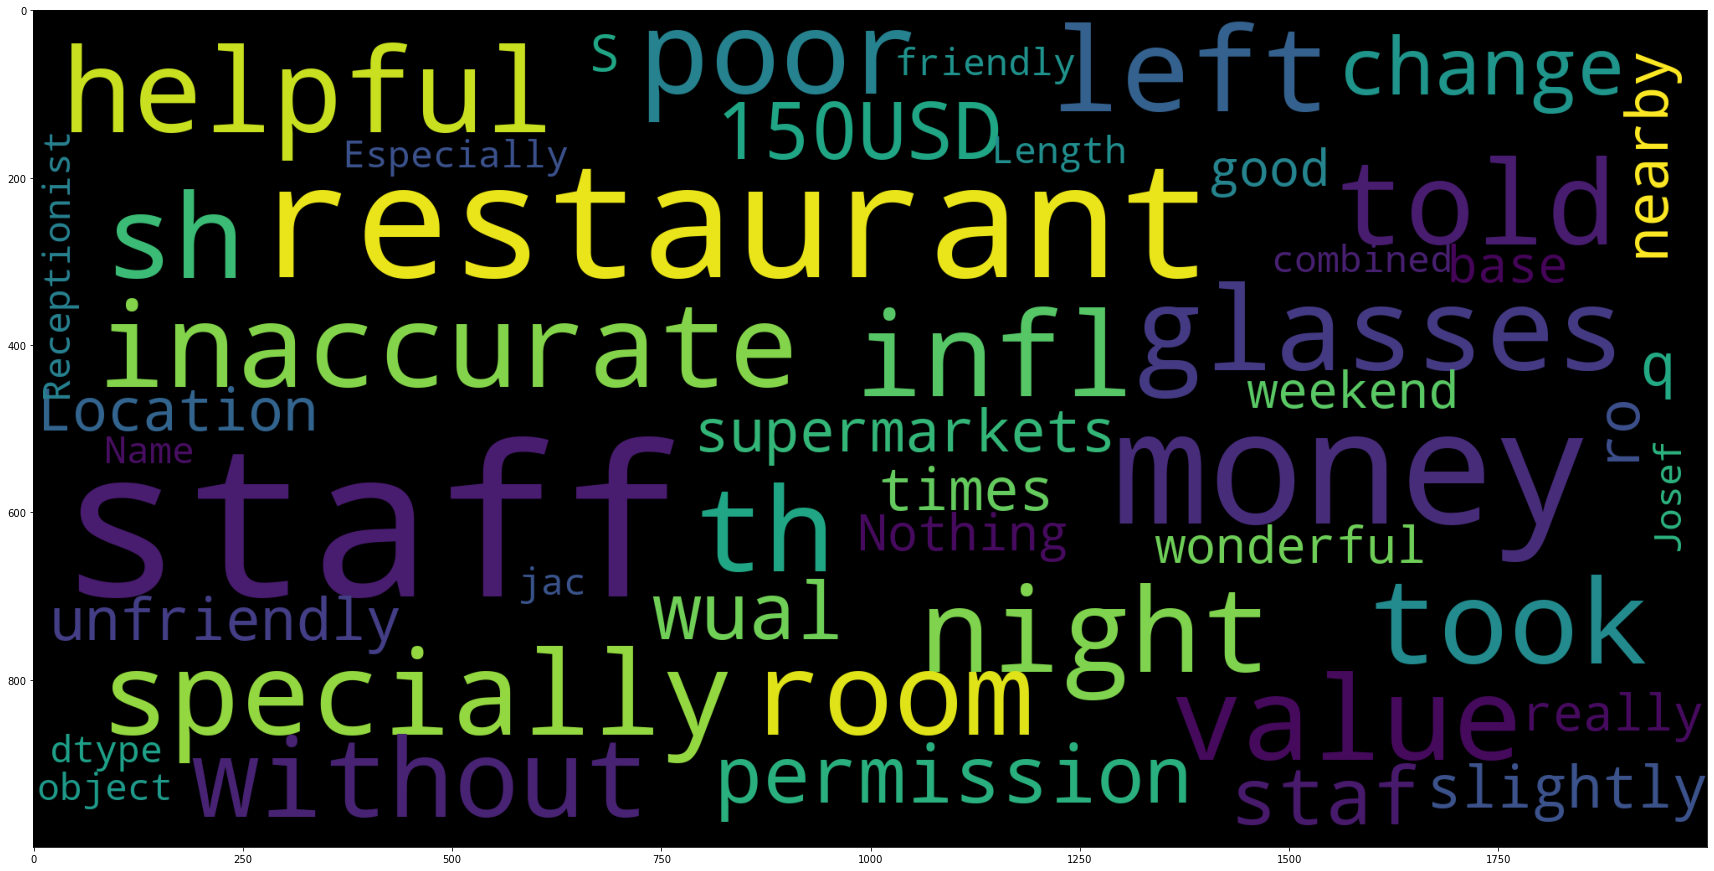

In [51]:
plot_wordcloud(dataset["combined"])

Lets get the most common positive and negative words. Then create an wordcloud to examine better 

In [52]:
dataset[dataset["num_word"] >= 10].sort_values("pos", ascending = False)[["combined", "pos"]].head(10)

,combined,pos
267854,N A Classy Great for relaxing and lovely food,0.824
315260,Nada Awesome design great room great view gre...,0.792
299617,Everything great Wonderful staff very helpful...,0.791
73868,N A Excellent location Fabulous bed Great bre...,0.789
116894,n a very nice perfect 5 star very good money ...,0.764
184235,Honestly I liked everything It s a beautiful...,0.763
360264,Can t improve on perfection Just lovely Perf...,0.760
379443,Everything was great Room fantastic beer love...,0.754
444386,all good all good convenient good facilities ...,0.752
298920,Excellent Very comfortable staff extremely he...,0.748


In [53]:
top_positive_reviews = dataset.sort_values("pos", ascending = False)
positive_reviews = top_positive_reviews[["combined", "pos"]]

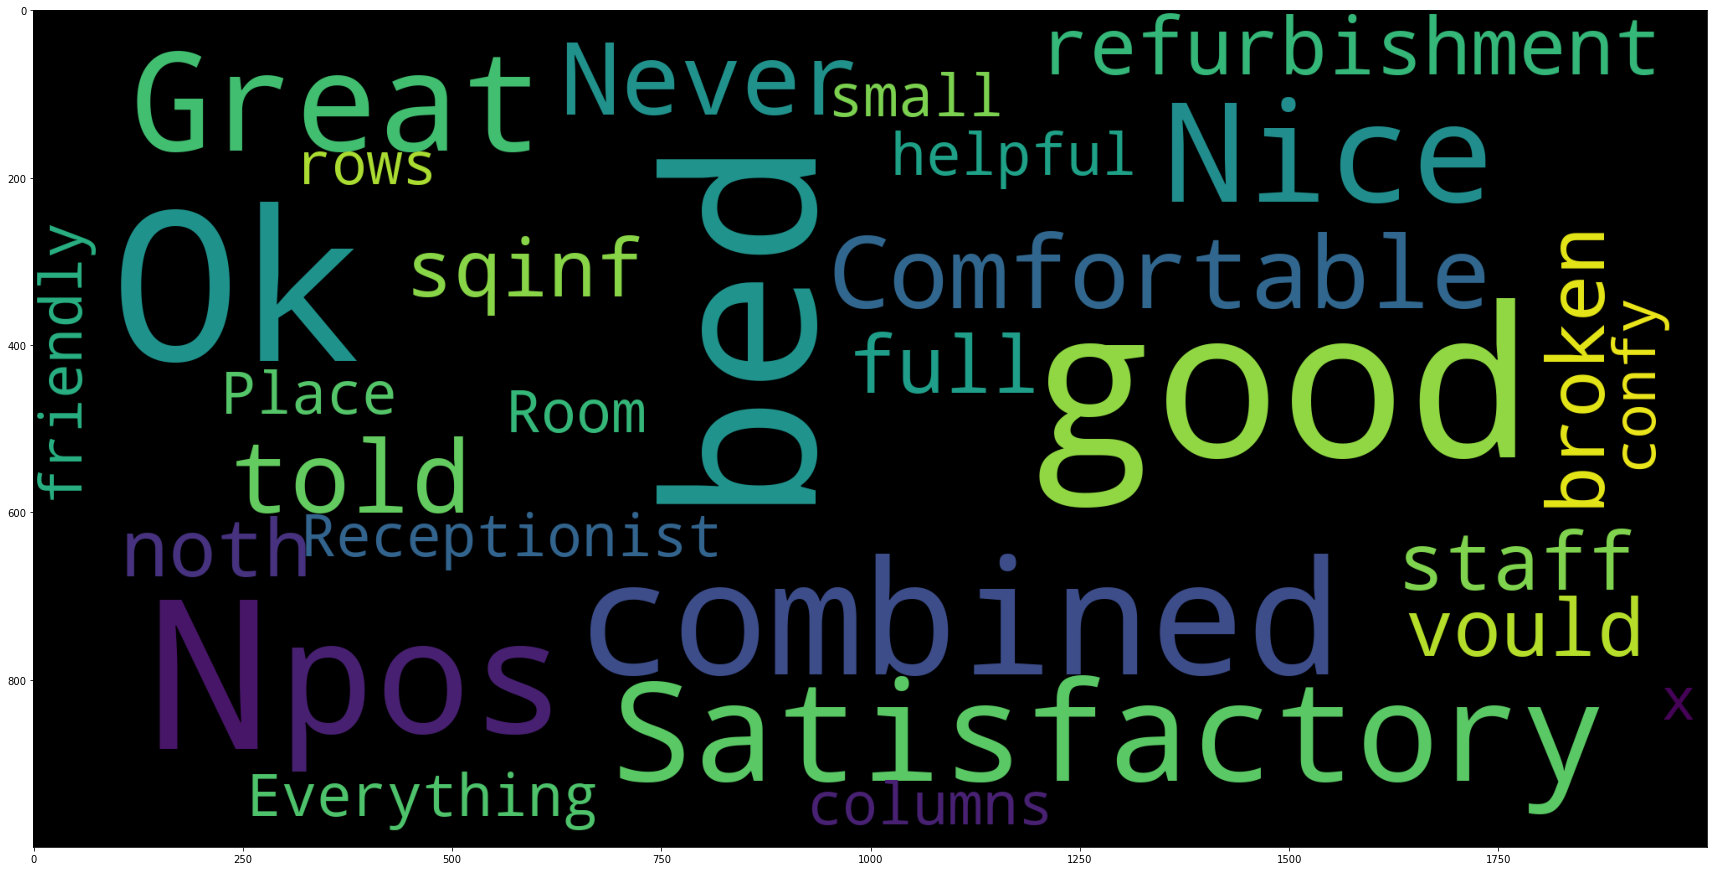

In [54]:
plot_wordcloud(positive_reviews)

In [55]:
top_negative_reviews = dataset.sort_values("neg", ascending = False)
negative_reviews = top_negative_reviews[["combined", "neg"]]

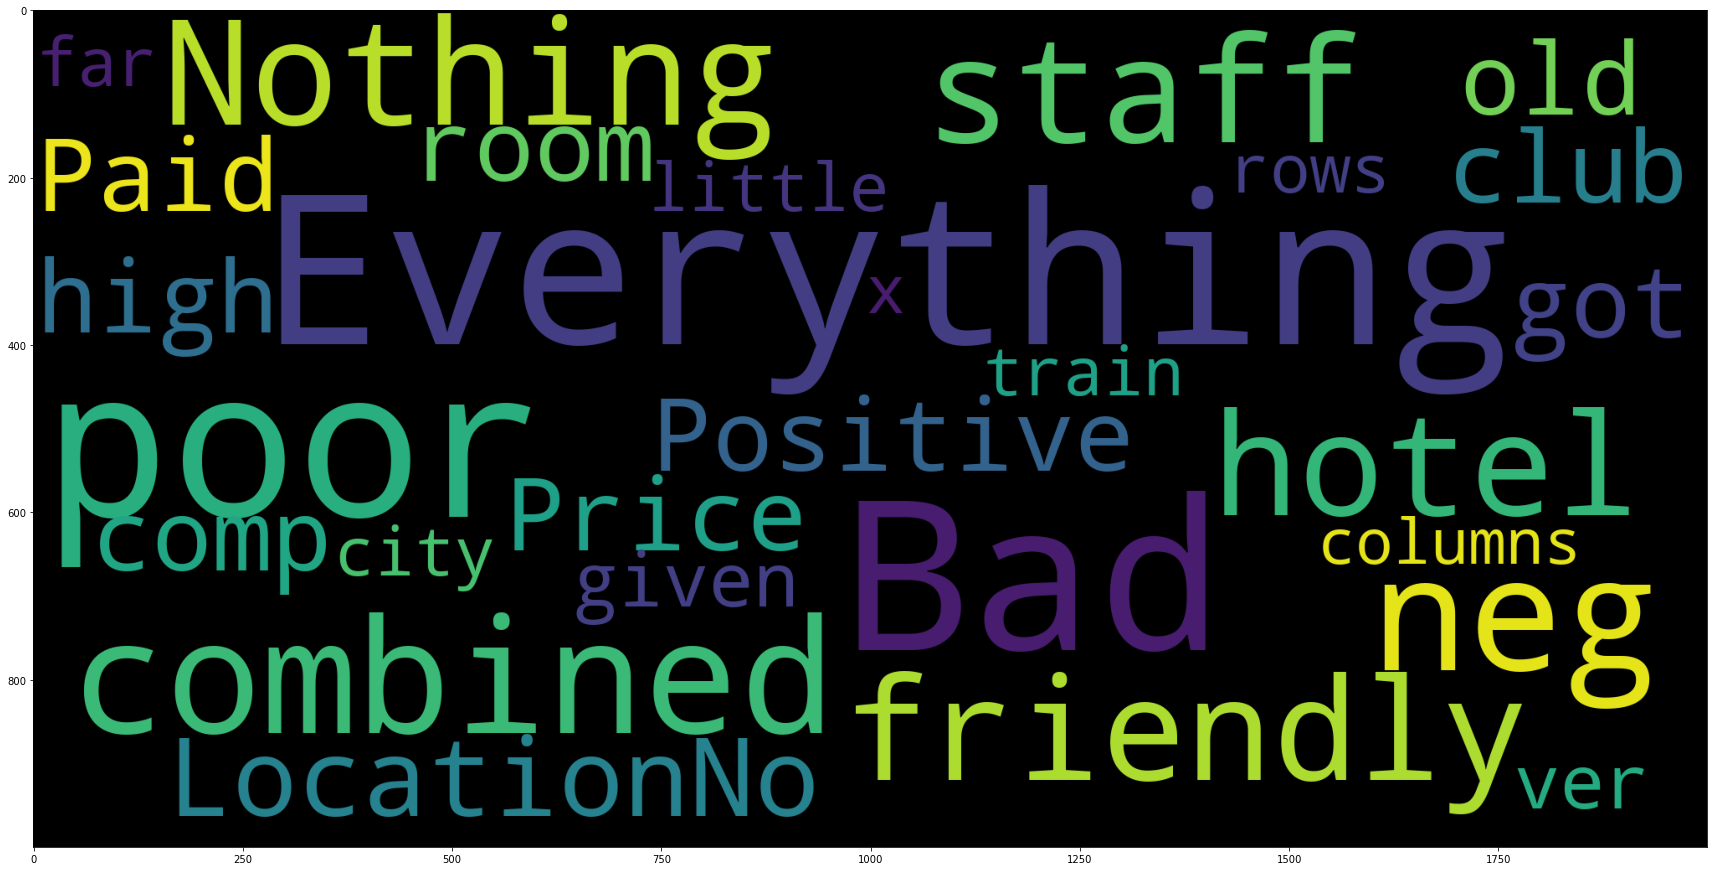

In [56]:
plot_wordcloud(negative_reviews)

# Machine Learning Models

We decided to compare 3 machine learning models. Those models are,

- Random Forest
- Logistic Regression
- Neural Networks

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [58]:
ignored_columns = ["is_bad?", "combined", "combined_clean"]
features = [col for col in dataset.columns if col not in ignored_columns]

X = dataset[features]
y = dataset["is_bad?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Neural Network

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1082/1082 [==============================] - 3s 2ms/step - loss: 0.5395 - accuracy: 0.7316 - val_loss: 0.4551 - val_accuracy: 0.7935
Epoch 2/20
1082/1082 [==============================] - 2s 2ms/step - loss: 0.4190 - accuracy: 0.8083 - val_loss: 0.4010 - val_accuracy: 0.8158
Epoch 3/20
1082/1082 [==============================] - 2s 2ms/step - loss: 0.3901 - accuracy: 0.8246 - val_loss: 0.3849 - val_accuracy: 0.8265
Epoch 4/20
1082/1082 [==============================] - 2s 2ms/step - loss: 0.3804 - accuracy: 0.8303 - val_loss: 0.4052 - val_accuracy: 0.8102
Epoch 5/20
1082/1082 [==============================] - 2s 2ms/step - loss: 0.3739 - accuracy: 0.8343 - val_loss: 0.4049 - val_accuracy: 0.8257
Epoch 6/20
1082/1082 [==============================] - 2s 2ms/step - loss: 0.3625 - accuracy: 0.8393 - val_loss: 0.3797 - val_accuracy: 0.8272
Epoch 7/20
1082/1082 [==============================] - 2s 2ms/step - loss: 0.3565 - accuracy: 0.8452 - val_loss: 0.3774 - val_accuracy:

In [61]:
predictions_nn = model.predict(X_test)
predictions_nn = (predictions_nn > 0.5).astype(int)

271/271 [==============================] - 0s 786us/step


In [62]:
confusion_matrix(predictions_nn, y_test)

array([[3275,  491],
       [ 998, 3889]], dtype=int64)

In [63]:
acc_nn = accuracy_score(predictions_nn, y_test)
prec_nn = precision_score(predictions_nn, y_test, average = 'weighted')
recall_nn = recall_score(predictions_nn, y_test, average = 'weighted')

In [64]:
print("Accuracy : ", acc_nn)
print("Precision : ", prec_nn)
print("Recall : ", recall_nn)

Accuracy :  0.8279209522708887
Precision :  0.8350375321191944
Recall :  0.8279209522708887


## Logistic Regression

In [65]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\tyavuzer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
predictions_lr = lr.predict(X_test)
confusion_matrix(predictions_lr, y_test)

array([[3374,  939],
       [ 899, 3441]], dtype=int64)

In [67]:
acc_lr = accuracy_score(predictions_lr, y_test)
prec_lr = precision_score(predictions_lr, y_test, average = 'weighted')
recall_lr = recall_score(predictions_lr, y_test, average = 'weighted')

In [68]:
print("Accuracy : ", acc_lr)
print("Precision : ", prec_lr)
print("Recall : ", recall_lr)

Accuracy :  0.7875881197272622
Precision :  0.7876065768428353
Recall :  0.7875881197272622


## Random Forest

In [69]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
importance_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_})
sorted_df = importance_df.sort_values("importance", ascending = False)

In [71]:
sorted_df.head(30)

,feature,importance
5,compound,0.050437
1,polarity,0.046947
4,pos,0.045147
2,neg,0.041815
2794,word_positive,0.021430
12,doc2vec_vector_4,0.020649
10,doc2vec_vector_2,0.019874
3,neu,0.017982
7,num_char,0.017363
8,doc2vec_vector_0,0.015503


Compound, polarity, pos and neg values looks like the most important features. It is also good to see the column that we created via Doc2Vec and TF-IDF which means all the work that we had done paid of.

In [72]:
predictions_rf = rf.predict(X_test)
confusion_matrix(predictions_rf, y_test)

array([[3387,  712],
       [ 886, 3668]], dtype=int64)

In [73]:
acc_rf = accuracy_score(predictions_rf, y_test)
prec_rf = precision_score(predictions_rf, y_test, average = 'weighted')
recall_rf = recall_score(predictions_rf, y_test, average = 'weighted')

In [74]:
print("Accuracy : ", acc_rf)
print("Precision : ", prec_rf)
print("Recall : ", recall_rf)

Accuracy :  0.8153241650294696
Precision :  0.8162248586353724
Recall :  0.8153241650294696


## Comparision

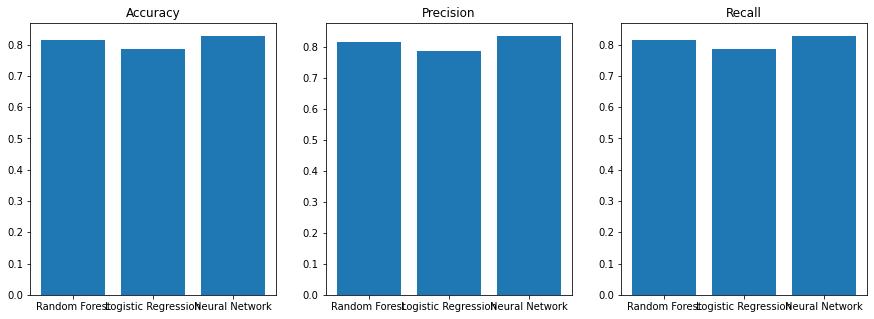

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(["Random Forest", "Logistic Regression","Neural Network"], [acc_rf, acc_lr, acc_nn])
axs[0].set_title("Accuracy")
axs[1].bar(["Random Forest", "Logistic Regression","Neural Network"], [prec_rf, prec_lr, prec_nn])
axs[1].set_title("Precision")
axs[2].bar(["Random Forest", "Logistic Regression","Neural Network"], [recall_rf, recall_lr, recall_nn])
axs[2].set_title("Recall")
plt.show()

# Conclusion

All three algorithms have good accuracy rates and precision scores, but with recall scores that match their accuracy, there may be room for improvement in correctly identifying all positive cases. 

In general, the Neural Network model seems to perform the best among the three, with the highest accuracy and precision scores. However, to determine which algorithm is best suited for a particular problem, it's important to consider additional factors such as the nature of the data. It may also be useful to experiment with different hyperparameters and techniques for improving the performance of each algorithm.However our main focus was to examine the text and provide insights about it.

This project is also great example that we dont always need to have the most complex models to have good predictions.